Importing required libraries

In [16]:
import numpy as np #NumPy is a Python library used for working with arrays and matrices
import pandas as pd # read and writing data files
import matplotlib.pyplot as plt #Used for ploting graphs
import os,cv2 
import joblib #creating and loading files/pipeling
from sklearn.model_selection import train_test_split    #train
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline 

Loading Data

Importing kaggle dataset from downloaded repository

In [17]:
train = pd.read_csv('digit-recognizer-kaggledataset/train.csv') #data
test = pd.read_csv('digit-recognizer-kaggledataset/test.csv')

Dividing dataset train.csv into train_y and train_x

mnist.load_data?

In [18]:
x = train.drop('label',axis=1)        #**x_train**: uint8 NumPy array of grayscale image data with shapes, containing the training data. Pixel values range from 0 to 255.
y = train['label'].values             #**y_train**: uint8 NumPy array of digit labels (integers in range 0-9) for the training data.

x_t = test.values                        #**x_test**: uint8 NumPy array of grayscale image data with shapes, containing the test data.

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30) # 30 % testing of train.csv | 70 % training

print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))
x_train.head()


x_train => (29400, 784)
y_train => (29400,)
x_test => (12600, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
31306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since the images are in square, the dimensions of the arrays are changed to (28,28) from (784)

In [19]:
# x_train = np.array(x_train).reshape(x_train.shape[0], 28, 28)
# x_test = np.array(x_test).reshape(x_test.shape[0], 28, 28)

In [20]:
print("x_train => {0}\ny_train => {1}\nx_test => {2}".format(x_train.shape, y_train.shape,x_test.shape))

x_train => (29400, 784)
y_train => (29400,)
x_test => (12600, 784)


Data Visualization

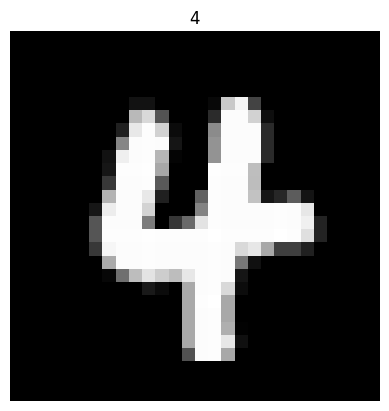

In [31]:
def display_img(i):
    img = x_train.iloc[i].values.reshape((28,28)) #train.iloc[:,1:].iloc[i].values.reshape(28,28)
    plt.imshow(#x_train[i],
            img,
            cmap = 'gray') #Greys
    plt.title(y_train[i])   #prints number shown in the image
    plt.axis('off')

display_img(9) #diplays the image at index i in train.csv

In [22]:
# #plt.imshow(train[1])
# def display_img(i):
#     #img = x_train.iloc[i].values.reshape((28,28))
#     plt.imshow(x_train[i],cmap = 'gray')
#     plt.title(y_train[i])   #prints number shown in the image
#     plt.axis('off')

# display_img(5) #diplays the image at index i in train.csv

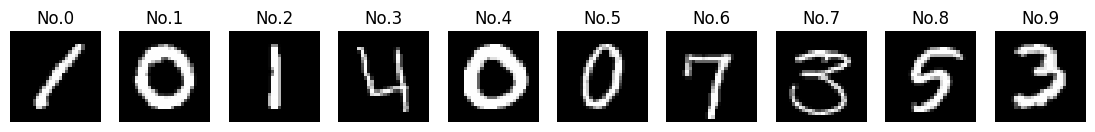

In [23]:
plt.figure(figsize=(28,28))
for i in range(10):
    plt.subplot(20, 20, i+1)
    plt.title("No." + str(i))
    plt.axis('off')
    plt.imshow(train.iloc[:,1:].iloc[i].values.reshape(28,28),cmap='gray')

1    1437
3    1304
0    1289
7    1282
9    1279
2    1255
8    1237
6    1211
4    1196
5    1110
dtype: int64


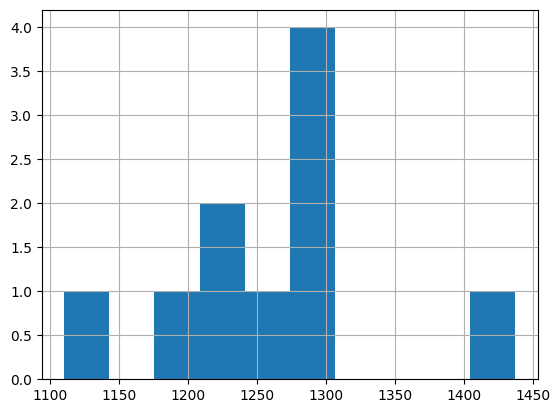

In [24]:
y_test_df = pd.DataFrame(y_test)
y_vals =y_test_df.value_counts()
print(y_vals)
y_vals.hist()
plt.show()

Creating Model


In [25]:

classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)
joblib.dump(classifier, "models/rfc_model")


['models/rfc_model']

Loading model

In [26]:
model_load = joblib.load("models/rfc_model")
prediction=model_load.predict(x_test)

In [27]:
print(metrics.classification_report(y_true=y_test, y_pred=prediction))
print(f"Accuracy = {metrics.accuracy_score(prediction, y_test)*100}")

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1289
           1       0.98      0.98      0.98      1437
           2       0.96      0.97      0.96      1255
           3       0.95      0.94      0.95      1304
           4       0.96      0.97      0.97      1196
           5       0.97      0.95      0.96      1110
           6       0.97      0.98      0.97      1211
           7       0.97      0.96      0.96      1282
           8       0.95      0.95      0.95      1237
           9       0.93      0.94      0.94      1279

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600

Accuracy = 96.25396825396825


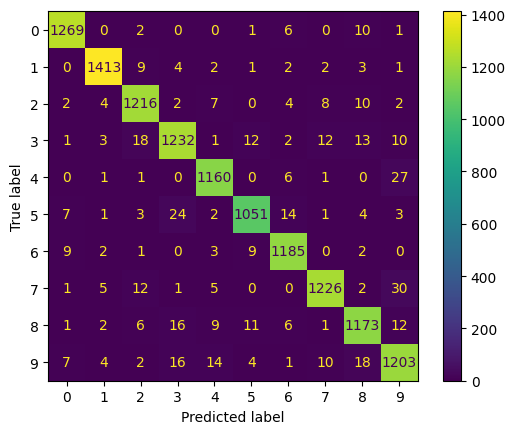

In [28]:
display_matrix = metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_true=y_test, y_pred=prediction))
display_matrix.plot()
plt.show()

c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


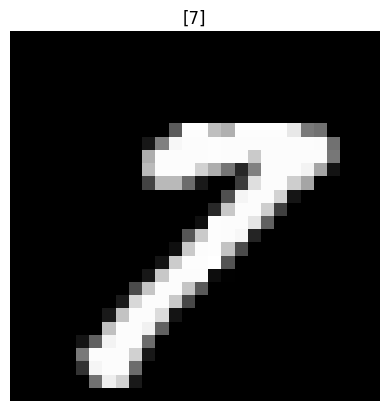

The digit is 7


In [34]:
from random import randrange
img = randrange(28001)
 
prediction_sample = model_load.predict(x_t[[img]])

plt.imshow(x_t[[img]].reshape(28,28),cmap='gray')
plt.title(prediction_sample)
plt.axis('off')
plt.show()
print("The digit is",int(prediction_sample))

old (28, 28)
new (1, 784)
The digit is 6
old (28, 28)
new (1, 784)
The digit is 1


c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Vanish\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


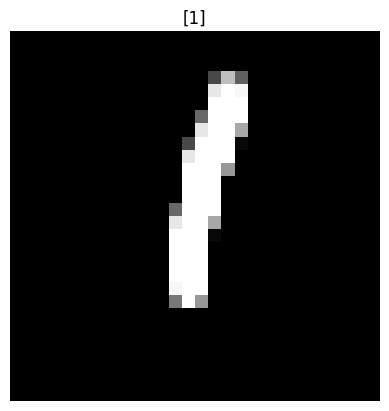

In [38]:
img_no = 1
while os.path.isfile(f"images/digit{img_no}.png"):
    try:
        img = cv2.imread(f"images/digit{img_no}.png")[:,:,0]
        nx, ny = img.shape
        print("old",img.shape)
        img = img.reshape((nx*ny))
        # img = np.array(img).reshape(img.shape[0], 784)
        img = np.invert(np.array([img]))
        print("new",img.shape)
        prediction_sample = model_load.predict(img)
        print(f"The digit is {int(prediction_sample)}")
        
        plt.imshow(img[0].reshape(28,28),cmap='gray')
        plt.title(prediction_sample)
        plt.axis('off')
    
    except:
        print("Something is wrong with the image")

    finally:
        img_no+=1        